In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
df = pd.DataFrame(
                  [
                      [6.82, 118, 0],
                      [6.36, 125, 1],
                      [5.39, 99, 1],
                      [5.50, 106, 1],
                      [6.39, 148, 0],
                      [9.13, 148, 1],
                      [7.17, 147, 1],
                      [7.72, 72, 0]
                   ], columns = ['cgpa',	'iq',	'is_placed']
)

df

,cgpa,iq,is_placed
0,6.82,118,0
1,6.36,125,1
2,5.39,99,1
3,5.50,106,1
4,6.39,148,0
5,9.13,148,1
6,7.17,147,1
7,7.72,72,0


# Stage :1 model 1

In [3]:

# step 1: calculate the log of dds of the dataset
# log oadds = log(no. of ones / no.of zeros)

df['pre1(log_odds)'] = np.log(5/3)

In [4]:
# after calculating log of odds caclulate the probability
df['pre1(probablity)'] = 1/(1+np.exp(-np.log(5/3)))

In [5]:
df.head()

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity)
0,6.82,118,0,0.510826,0.625
1,6.36,125,1,0.510826,0.625
2,5.39,99,1,0.510826,0.625
3,5.50,106,1,0.510826,0.625
4,6.39,148,0,0.510826,0.625


In [6]:
# calculate residulas
# reduals = actual labes - probality

df['res1'] = df['is_placed'] - df['pre1(probablity)']

In [7]:
df.head()

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1
0,6.82,118,0,0.510826,0.625,-0.625
1,6.36,125,1,0.510826,0.625,0.375
2,5.39,99,1,0.510826,0.625,0.375
3,5.50,106,1,0.510826,0.625,0.375
4,6.39,148,0,0.510826,0.625,-0.625


# Stage 2 : Model 2

In [8]:
# train a deciso tree
from sklearn.tree import DecisionTreeRegressor

dt1 = DecisionTreeRegressor(max_leaf_nodes = 3, random_state = 1)

In [9]:
dt1.fit(df.iloc[:,0:2],df.iloc[:,-1])

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

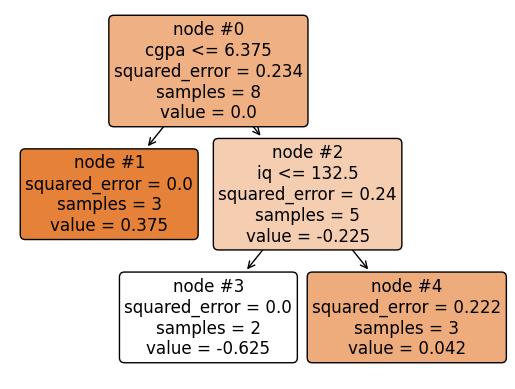

In [10]:
# plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(dt1, feature_names = ['cgpa','iq'],filled = True , rounded = True , node_ids = True)
plt.show()

In [11]:

# now which are the rows(sample) fall in which leaf node
df['leaf_entry1'] = dt1.apply(df.iloc[:,0:2])
df

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1,leaf_entry1
0,6.82,118,0,0.510826,0.625,-0.625,3
1,6.36,125,1,0.510826,0.625,0.375,1
2,5.39,99,1,0.510826,0.625,0.375,1
3,5.50,106,1,0.510826,0.625,0.375,1
4,6.39,148,0,0.510826,0.625,-0.625,4
5,9.13,148,1,0.510826,0.625,0.375,4
6,7.17,147,1,0.510826,0.625,0.375,4
7,7.72,72,0,0.510826,0.625,-0.625,3


In [16]:

# now calculate the log odds for leaf nodes

def return_logs(leaf):
  temp_df = df[df['leaf_entry1'] == leaf]
  num = temp_df['res1'].sum()

  den = sum(temp_df['pre1(probablity)'] * (1 - temp_df['pre1(probablity)']))
  return round(num/den,2)

In [17]:
 # log odds has been calculated for each leaf nodes
df['pre2(log_odds)'] = df['pre1(log_odds)'] + df['leaf_entry1'].apply(return_logs)

In [19]:
# now calculate the probablity for the model two

df['pre2(probablity)'] = 1/(1+np.exp(-df['pre2(log_odds)']))

In [20]:
df.head()

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1,leaf_entry1,pre2(log_odds),pre2(probablity)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151


In [23]:

# now caclulate the residuals 2
df['res2'] = df['is_placed'] - df['pre2(probablity)']

In [26]:
df.head()

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1,leaf_entry1,pre2(log_odds),pre2(probablity),res2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151


In [29]:
dt2 =DecisionTreeRegressor(max_leaf_nodes= 3, random_state= 1)
dt2.fit(df.iloc[:,0:2],df.iloc[:,-1])

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1)

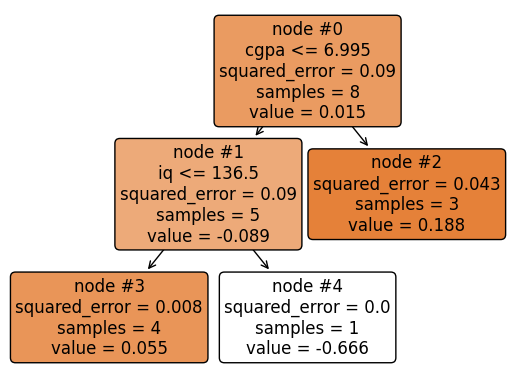

In [31]:
plot_tree(dt2,filled =True ,feature_names=['cgpa','iq'], rounded = True, node_ids= True)
plt.show()

In [32]:
# Now calculate the log of odds for the each leaf node
df['leaf_entry2'] = dt1.apply(df.iloc[:,0:2])
df

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1,leaf_entry1,pre2(log_odds),pre2(probablity),res2,leaf_entry2
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2


In [34]:
def return_logs(leaf):
  num = df[df['leaf_entry2'] == leaf]['res2'].sum()
  den = sum(df[df['leaf_entry2'] == leaf]['pre2(probablity)'] * (1 - df[df['leaf_entry2'] == leaf]['pre2(probablity)']))
  return round(num/den,2)

In [36]:
df['pre3(log_odds)'] = df['pre1(log_odds)'] + df['pre2(log_odds)'] + df['leaf_entry2'].apply(return_logs)

In [37]:
df.head()

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1,leaf_entry1,pre2(log_odds),pre2(probablity),res2,leaf_entry2,pre3(log_odds)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349


In [41]:
df['pre3(probablity)'] = 1/(1+np.exp(-df['pre3(log_odds)']))
df

,cgpa,iq,is_placed,pre1(log_odds),pre1(probablity),res1,leaf_entry1,pre2(log_odds),pre2(probablity),res2,leaf_entry2,pre3(log_odds),pre3(probablity)
0,6.82,118,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,3,-1.068349,0.255717
1,6.36,125,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
2,5.39,99,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
3,5.50,106,1,0.510826,0.625,0.375,1,2.110826,0.891951,0.108049,3,3.201651,0.960896
4,6.39,148,0,0.510826,0.625,-0.625,4,0.690826,0.666151,-0.666151,4,-1.798349,0.142052
5,9.13,148,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
6,7.17,147,1,0.510826,0.625,0.375,4,0.690826,0.666151,0.333849,2,2.251651,0.904793
7,7.72,72,0,0.510826,0.625,-0.625,3,-2.159174,0.103477,-0.103477,2,-0.598349,0.354722


In [42]:
df['res_final'] = df['is_placed'] - df['pre3(probablity)']


In [43]:
df[['res1','res2','res_final']]

,res1,res2,res_final
0,-0.625,-0.103477,-0.255717
1,0.375,0.108049,0.039104
2,0.375,0.108049,0.039104
3,0.375,0.108049,0.039104
4,-0.625,-0.666151,-0.142052
5,0.375,0.333849,0.095207
6,0.375,0.333849,0.095207
7,-0.625,-0.103477,-0.354722
